In [1]:
import matplotlib.pyplot as plt
import dill
import os
import torch.nn as nn
import numpy as np

import utilities as utilities
import params as params
import networks as networks

# Model Activation Functions
activation_functions = [
    nn.Tanh,
    nn.Sigmoid,
    nn.Hardsigmoid,
    # nn.Hardtanh,
    nn.ReLU,
    nn.SiLU,
    nn.ELU,
    nn.GELU,
]

try:
    file_location = os.path.dirname(__file__)
except NameError:
    file_location = os.getcwd()
result_folder = os.path.join(file_location, "result")

dataset_types_all = list(params.dataset_kwargs_dict.keys())
ode_variants = list(params.ode_kwargs_dict.keys())

dataset_types = [d for d in dataset_types_all if d == "Circle"]
# ode_variants = [v for v in ode_variants_all if v.split(" ")[0] == "Shallow"]
solver_methods = list(params.solver_method_kwargs_dict.keys())
act_names = [a.__name__ for a in activation_functions]

test_acc_matrix = np.zeros(
    shape=(len(ode_variants) * len(solver_methods), len(dataset_types) * len(act_names))
)
test_loss_matrix = np.zeros(
    shape=(len(ode_variants) * len(solver_methods), len(dataset_types) * len(act_names))
)

train_acc_matrix = np.zeros(
    shape=(len(ode_variants) * len(solver_methods), len(dataset_types) * len(act_names))
)
train_loss_matrix = np.zeros(
    shape=(len(ode_variants) * len(solver_methods), len(dataset_types) * len(act_names))
)

x_label = np.zeros(shape=test_acc_matrix.shape[1], dtype=object)
y_label = np.zeros(shape=test_acc_matrix.shape[0], dtype=object)


# Set parameters
for i, dataset_type in enumerate(dataset_types):
    for j, act_name in enumerate(act_names):
        for k, ode_variant in enumerate(ode_variants):
            for l, solver_method in enumerate(solver_methods):
                y_label[k * (len(solver_methods)) + l] = f"{ode_variant} {solver_method}"
                x_label[i * (len(act_names)) + j] = f"{dataset_type} {act_name}"

                try:
                    reloaded_model = dill.load(
                        open(
                            os.path.join(
                                result_folder,
                                f"{ode_variant}_{solver_method}_{dataset_type}_{act_name}_class.pickle",
                            ),
                            "rb",
                        )
                    )
                except:
                    continue

                test_acc_matrix[
                    k * (len(solver_methods)) + l, i * (len(act_names)) + j
                ] = reloaded_model.test_acc_per_epoch[-1]
                test_loss_matrix[
                    k * (len(solver_methods)) + l, i * (len(act_names)) + j
                ] = reloaded_model.test_loss_per_epoch[-1]

                train_acc_matrix[
                    k * (len(solver_methods)) + l, i * (len(act_names)) + j
                ] = reloaded_model.train_acc_per_epoch[-1]
                train_loss_matrix[
                    k * (len(solver_methods)) + l, i * (len(act_names)) + j
                ] = reloaded_model.train_loss_per_epoch[-1]

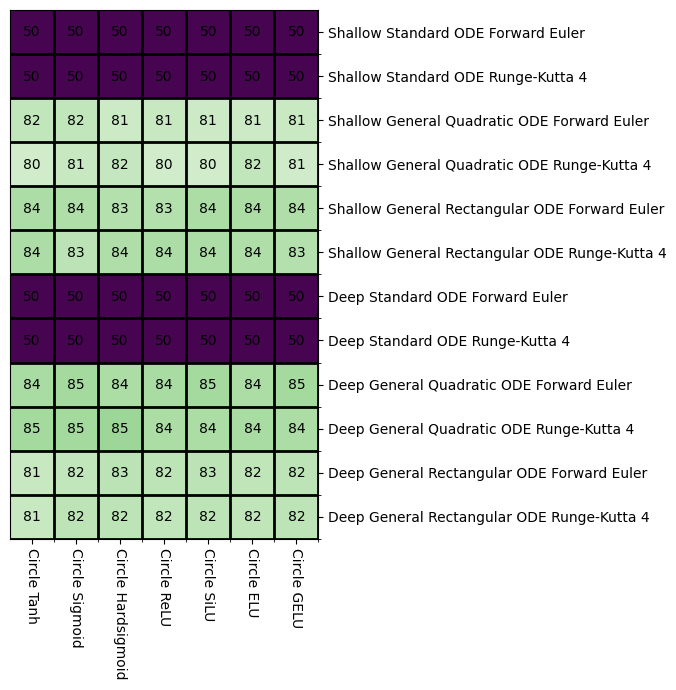

In [2]:
data = test_acc_matrix
name = "test_acc"

fig, ax = plt.subplots(figsize=(30, 7))
s = ax.imshow(data, vmin=50, vmax=100, cmap="PRGn")

ax = plt.gca()

for (i, j), z in np.ndenumerate(data):
    ax.annotate(f"{int(z)}", xy=(j - 0.2, i + 0.1), fontsize=10)


# Major ticks
ax.set_xticks(np.arange(0, len(x_label), 1))
ax.set_yticks(np.arange(0, len(y_label), 1))

# Gridlines based on minor ticks

# Labels for major ticks
ax.set_xticklabels(x_label)
ax.set_yticklabels(y_label)

# Minor ticks
ax.set_xticks(np.arange(0.5, len(x_label), 1), minor=True)
ax.set_yticks(np.arange(0.5, len(y_label), 1), minor=True)

ax.yaxis.tick_right()
plt.grid(which="minor", color="black", linestyle="-", linewidth=2)
plt.xticks(rotation=-90)
# fig.colorbar(s, ax=ax)
plt.tight_layout()
plt.savefig(
    os.path.join(result_folder, f"{name}_matrix_{dataset_type}.png"), bbox_inches="tight"
)
plt.show()

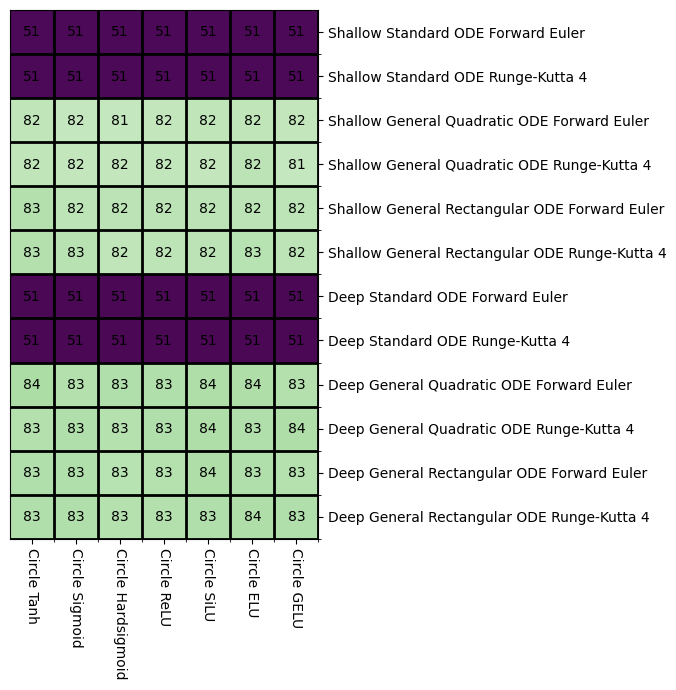

In [3]:
data = train_acc_matrix
name = "train_acc"

fig, ax = plt.subplots(figsize=(30, 7))
s = ax.imshow(data, vmin=50, vmax=100, cmap="PRGn")

ax = plt.gca()

for (i, j), z in np.ndenumerate(data):
    ax.annotate(f"{int(z)}", xy=(j - 0.2, i + 0.1), fontsize=10)


# Major ticks
ax.set_xticks(np.arange(0, len(x_label), 1))
ax.set_yticks(np.arange(0, len(y_label), 1))

# Gridlines based on minor ticks

# Labels for major ticks
ax.set_xticklabels(x_label)
ax.set_yticklabels(y_label)

# Minor ticks
ax.set_xticks(np.arange(0.5, len(x_label), 1), minor=True)
ax.set_yticks(np.arange(0.5, len(y_label), 1), minor=True)

ax.yaxis.tick_right()
plt.grid(which="minor", color="black", linestyle="-", linewidth=2)
plt.xticks(rotation=-90)
# fig.colorbar(s, ax=ax)
plt.tight_layout()
plt.savefig(
    os.path.join(result_folder, f"{name}_matrix_{dataset_type}.png"), bbox_inches="tight"
)
plt.show()

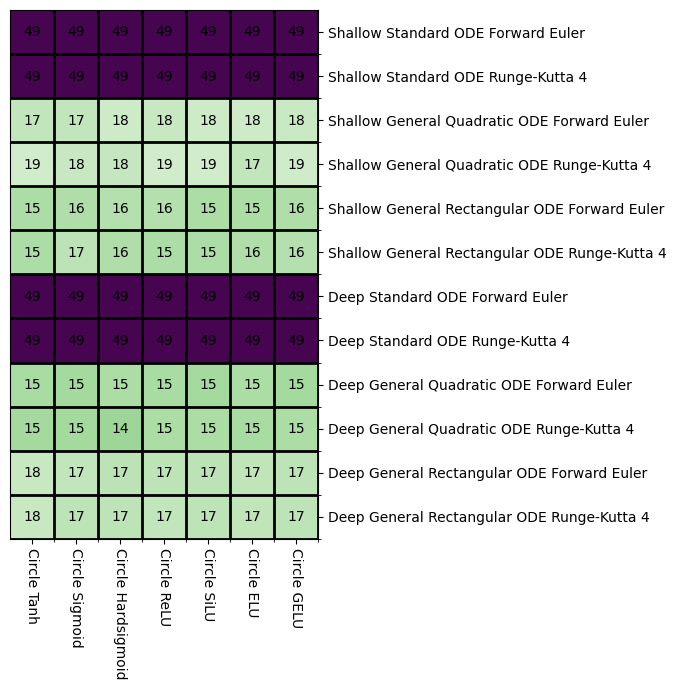

In [4]:
data = test_loss_matrix
name = "test_loss"

fig, ax = plt.subplots(figsize=(30, 7))
s = ax.imshow(data, vmin=0, vmax=50, cmap="PRGn_r")

ax = plt.gca()

for (i, j), z in np.ndenumerate(data):
    ax.annotate(f"{int(z)}", xy=(j - 0.2, i + 0.1), fontsize=10)


# Major ticks
ax.set_xticks(np.arange(0, len(x_label), 1))
ax.set_yticks(np.arange(0, len(y_label), 1))

# Gridlines based on minor ticks

# Labels for major ticks
ax.set_xticklabels(x_label)
ax.set_yticklabels(y_label)

# Minor ticks
ax.set_xticks(np.arange(0.5, len(x_label), 1), minor=True)
ax.set_yticks(np.arange(0.5, len(y_label), 1), minor=True)

ax.yaxis.tick_right()
plt.grid(which="minor", color="black", linestyle="-", linewidth=2)
plt.xticks(rotation=-90)
# fig.colorbar(s, ax=ax)
plt.tight_layout()
plt.savefig(
    os.path.join(result_folder, f"{name}_matrix_{dataset_type}.png"), bbox_inches="tight"
)
plt.show()

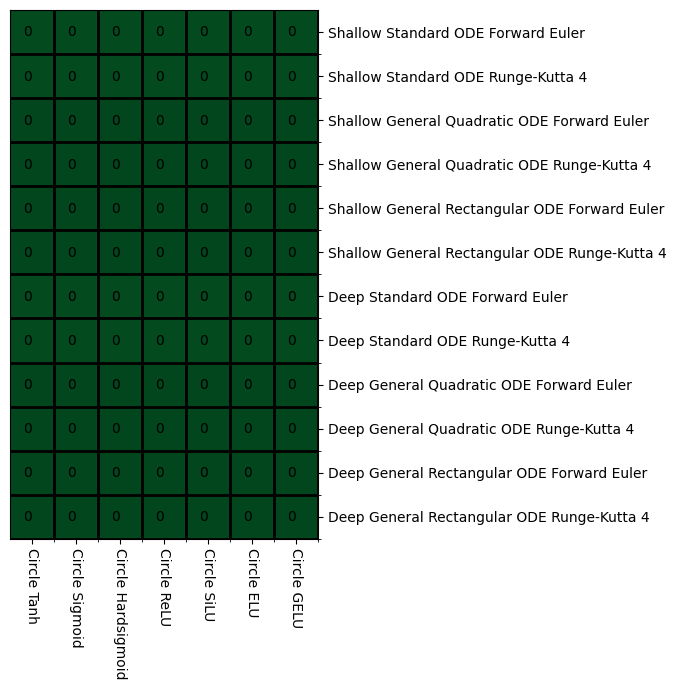

In [5]:
data = train_loss_matrix
name = "train_loss"

fig, ax = plt.subplots(figsize=(30, 7))
s = ax.imshow(data, vmin=0, vmax=50, cmap="PRGn_r")

ax = plt.gca()

for (i, j), z in np.ndenumerate(data):
    ax.annotate(f"{int(z)}", xy=(j - 0.2, i + 0.1), fontsize=10)


# Major ticks
ax.set_xticks(np.arange(0, len(x_label), 1))
ax.set_yticks(np.arange(0, len(y_label), 1))

# Gridlines based on minor ticks

# Labels for major ticks
ax.set_xticklabels(x_label)
ax.set_yticklabels(y_label)

# Minor ticks
ax.set_xticks(np.arange(0.5, len(x_label), 1), minor=True)
ax.set_yticks(np.arange(0.5, len(y_label), 1), minor=True)

ax.yaxis.tick_right()
plt.grid(which="minor", color="black", linestyle="-", linewidth=2)
plt.xticks(rotation=-90)
# fig.colorbar(s, ax=ax)
plt.tight_layout()
plt.savefig(
    os.path.join(result_folder, f"{name}_matrix_{dataset_type}.png"), bbox_inches="tight"
)
plt.show()

In [15]:
import matplotlib.pyplot as plt
import dill
import os
import torch.nn as nn
import numpy as np

import utilities as utilities
import params as params
import networks as networks

try:
    file_location = os.path.dirname(__file__)
except NameError:
    file_location = os.getcwd()

out_folder = os.path.join(file_location, "figures")
result_folder = os.path.join(file_location, "result")
out_folder_data = os.path.join(out_folder, dataset_type)

# Set parameters
dataset_type = "Circle"
ode_variant = "Deep General Quadratic ODE"
solver_method = "Forward Euler"
act_name = "ReLU"

out_folder_data_act = os.path.join(out_folder_data, act_name)

reloaded_model = dill.load(
    open(
        os.path.join(
            result_folder,
            f"{ode_variant}_{solver_method}_{dataset_type}_{act_name}_class.pickle",
        ),
        "rb",
    )
)

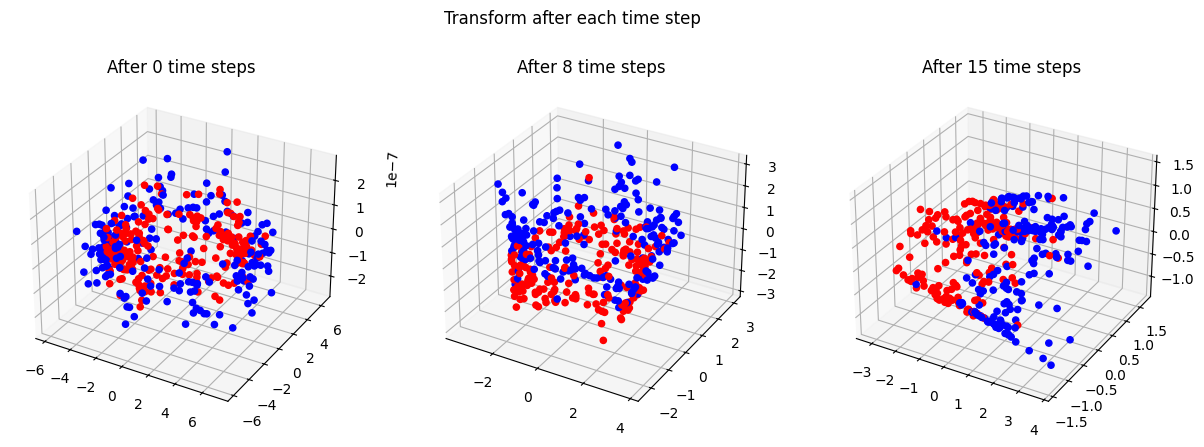

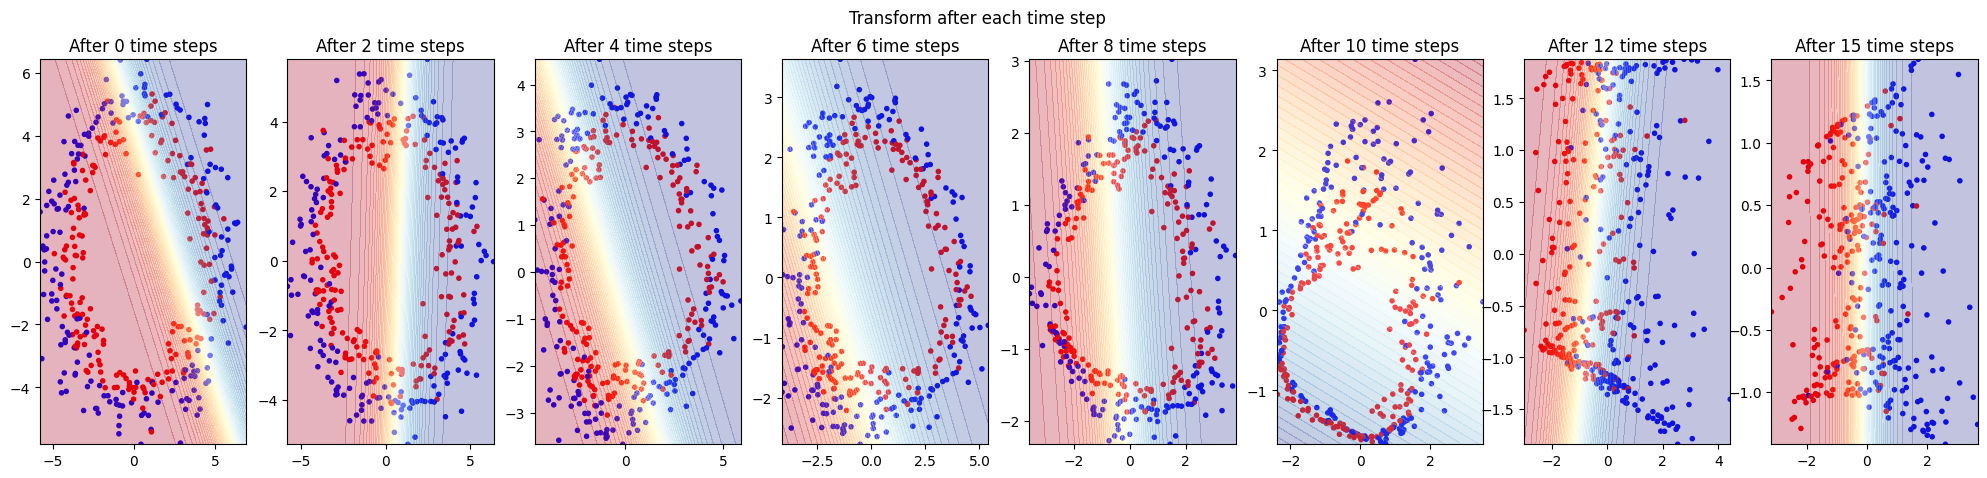

In [16]:
# 3D plot for transformation with time stepping
utilities.plot_transformation_3d(
    x_transformed_reduced=reloaded_model.x_transformed_reduced,
    color_transformed_reduced=reloaded_model.color_transformed_reduced,
    static=True,
    interactive=False,
    fig_show=False,
    fig_save=False,
    fig_fname=os.path.join(
        out_folder_data_act,
        f"{ode_variant}_{solver_method}_{dataset_type}_{act_name}_3d.png",
    ),
)

# 2D plot for transformation with time stepping
utilities.plot_transformation_2d(
    x_transformed_reduced=reloaded_model.x_transformed_reduced,
    color_transformed_reduced=reloaded_model.color_transformed_reduced,
    show_decision_boundary=True,
    model=reloaded_model,
    # FIXME: more columns for multiple time steps
    # num_col=3, 6,
    num_col=8,
    fig_show=False,
    fig_save=False,
    fig_size=(25, 5),
    fig_fname=os.path.join(
        out_folder_data_act,
        f"{ode_variant}_{solver_method}_{dataset_type}_{act_name}_2d.png",
    ),
)